In [1]:
import pandas as pd
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler


In [2]:
bioclim = pd.read_csv('data/csv/bioclim.csv')
bioclim = bioclim.drop(columns=['Unnamed: 0'])
bioclim = bioclim[bioclim['bio_13']!=-3.4e+38]
coords = bioclim[['lat', 'lon']]
bioclim = bioclim.drop(columns=['lat', 'lon'])
bioclim['group'] = 'osmia'

In [50]:
america = pd.read_csv('data/csv/america_bioclim_ndvi.csv', index_col=None)
america = america.drop(columns=['Unnamed: 0'])
america = america[america['bio_13']!= -3.4e+38]
america_points = america[['lat', 'lon']]
america = america.drop(columns=['lat', 'lon'])
america['group'] = 'america'

In [4]:
sahara = pd.read_csv('data/csv/sahara_bioclim_ndvi.csv')
sahara = sahara.drop(columns=['Unnamed: 0'])
sahara_points = sahara[['lat','lon']]
sahara = sahara.drop(columns=['lat', 'lon'])
sahara['group'] = 'sahara'

In [5]:
siberia = pd.read_csv('data/csv/siberia_bioclim_ndvi.csv')
siberia = siberia.drop(columns=['Unnamed: 0'])
siberia = siberia.dropna()
siberia_points = siberia[['lat', 'lon']]
siberia['group'] = 'siberia'
siberia = siberia.drop(columns=['lat', 'lon'])


In [6]:
column_order = bioclim.columns.tolist()
america = america[column_order]
sahara = sahara[column_order]
siberia = siberia[column_order]

In [7]:
combined = pd.concat([bioclim, america, siberia, sahara], ignore_index=True)
combined_points = pd.concat([coords, america_points, sahara_points, siberia_points])

In [8]:
combined.iloc[14]

bio_13         64.0
bio_11     2.233333
bio_9      6.066667
bio_3      32.46795
elev            105
bio_5          25.1
bio_6          -0.9
bio_17        123.0
bio_10    18.783333
bio_2      8.441667
bio_15    15.610257
bio_12        599.0
bio_1       10.2875
bio_16        181.0
bio_8     17.116667
bio_4     671.96497
bio_19        134.0
bio_7          26.0
bio_14         38.0
bio_18        172.0
ndvi       0.202708
group         osmia
Name: 14, dtype: object

In [9]:
combined_points

,lat,lon
0,51.024975,13.708278
1,51.024975,13.708278
2,51.024975,13.791615
3,51.024975,13.791615
4,51.024975,13.791615
...,...,...
67,73.222222,90.000000
68,73.222222,100.000000
70,75.111111,60.000000
71,75.111111,90.000000


In [10]:
combined_vars = combined.drop(columns=['group'])
scaler = StandardScaler()
df_scaled = scaler.fit_transform(combined_vars)
combined_scaled = pd.DataFrame(df_scaled, columns=combined_vars.columns)
combined_scaled

,bio_13,bio_11,bio_9,bio_3,elev,bio_5,bio_6,bio_17,bio_10,bio_2,...,bio_12,bio_1,bio_16,bio_8,bio_4,bio_19,bio_7,bio_14,bio_18,ndvi
0,0.054939,-0.656488,-0.986884,-1.642531,0.419428,0.718409,-0.557046,-1.146336,0.787057,0.037321,...,-0.953352,-0.164609,-0.007223,1.550017,1.124914,-1.384436,0.828421,-1.200107,0.548951,-1.363572
1,0.054939,-0.656488,-0.986884,-1.642531,0.419428,0.718409,-0.557046,-1.146336,0.787057,0.037321,...,-0.953352,-0.164609,-0.007223,1.550017,1.124914,-1.384436,0.828421,-1.200107,0.548951,-1.363572
2,-0.012065,-0.542081,-0.888457,-1.473503,0.030016,0.882716,-0.492151,-1.318099,0.980854,0.154352,...,-1.102913,0.031134,-0.079114,1.606185,1.108983,-1.569969,0.855776,-1.308571,0.473451,-1.454134
3,-0.012065,-0.542081,-0.888457,-1.473503,0.030016,0.882716,-0.492151,-1.318099,0.980854,0.154352,...,-1.102913,0.031134,-0.079114,1.606185,1.108983,-1.569969,0.855776,-1.308571,0.473451,-1.454134
4,-0.012065,-0.542081,-0.888457,-1.473503,0.030016,0.882716,-0.492151,-1.318099,0.980854,0.154352,...,-1.102913,0.031134,-0.079114,1.606185,1.108983,-1.569969,0.855776,-1.308571,0.473451,-1.454134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33810,-4.970388,3.824482,7.795472,1.883715,0.219973,11.179288,1.681798,-5.371715,11.936114,5.983995,...,-6.163067,8.480726,-5.135446,0.819821,2.888558,-4.538505,4.165639,-5.104794,-5.189005,-2.538158
33811,-4.568362,2.737608,5.294536,4.408937,2.266761,5.483312,1.389775,-5.440420,5.563596,4.308978,...,-5.905490,4.934758,-4.728064,-0.141658,0.362342,-4.008409,1.566985,-5.104794,-5.239338,-2.419444
33812,-3.161271,4.053297,5.594291,5.086306,-0.079209,5.921464,2.460526,-5.406067,6.600983,3.716506,...,-5.174302,6.392796,-3.410063,0.895814,-0.438808,-2.603656,0.883129,-5.104794,-5.063173,-2.584444
33813,-4.769375,3.767278,5.437703,5.759743,0.087003,5.209467,2.233397,-5.440420,5.928391,3.833537,...,-6.163067,5.926023,-4.919773,0.393598,-0.426994,-4.220448,0.719004,-5.104794,-5.239338,-2.418111


In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  
pca_result = pca.fit_transform(combined_scaled)
combined['PC1'] = pca_result[:,0]
combined['PC2'] = pca_result[:,1]
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.33357281 0.26557954]


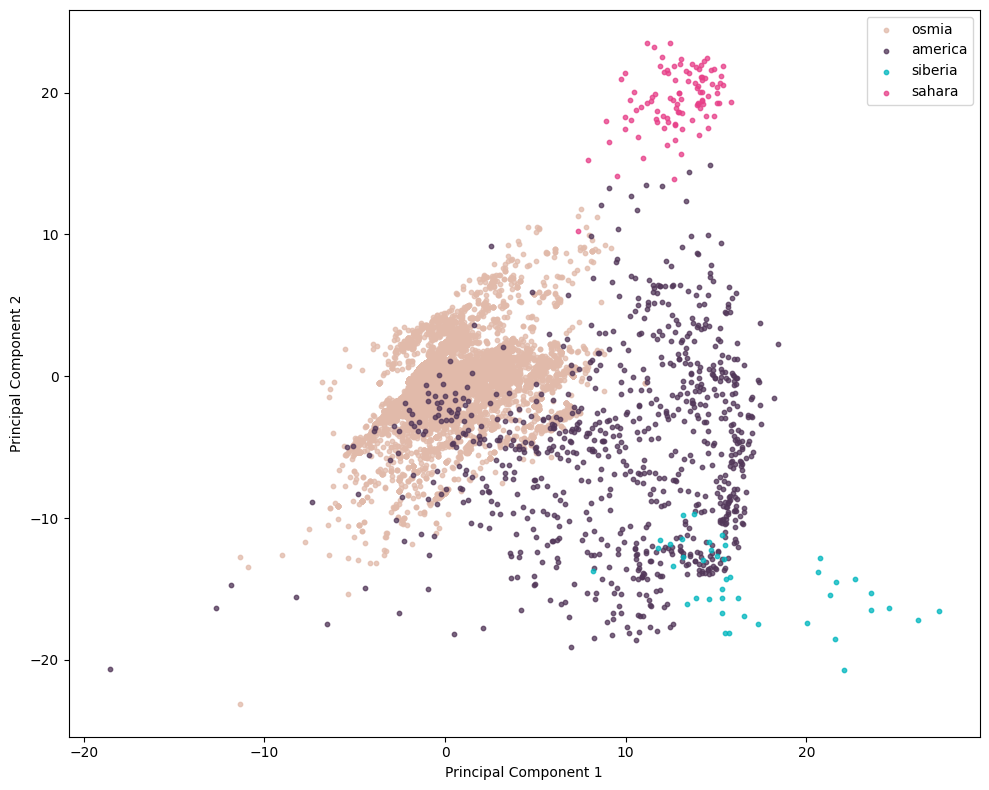

In [39]:
colors = ['#E1BAAA', '#523759', '#00B6BE','#E73F88']

plt.figure(figsize=(10, 8))

unique_labels = combined['group'].unique()  
for i, label in enumerate(unique_labels):
    subset = combined[combined['group'] == label]  
    plt.scatter(subset['PC1'], subset['PC2'], c=colors[i], label=label, s=10, marker= 'o', alpha=0.76)
plt.legend()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.savefig('figures/pca1.png')

In [28]:
combined_scaled

,bio_13,bio_11,bio_9,bio_3,elev,bio_5,bio_6,bio_17,bio_10,bio_2,...,bio_12,bio_1,bio_16,bio_8,bio_4,bio_19,bio_7,bio_14,bio_18,ndvi
0,0.054939,-0.656488,-0.986884,-1.642531,0.419428,0.718409,-0.557046,-1.146336,0.787057,0.037321,...,-0.953352,-0.164609,-0.007223,1.550017,1.124914,-1.384436,0.828421,-1.200107,0.548951,-1.363572
1,0.054939,-0.656488,-0.986884,-1.642531,0.419428,0.718409,-0.557046,-1.146336,0.787057,0.037321,...,-0.953352,-0.164609,-0.007223,1.550017,1.124914,-1.384436,0.828421,-1.200107,0.548951,-1.363572
2,-0.012065,-0.542081,-0.888457,-1.473503,0.030016,0.882716,-0.492151,-1.318099,0.980854,0.154352,...,-1.102913,0.031134,-0.079114,1.606185,1.108983,-1.569969,0.855776,-1.308571,0.473451,-1.454134
3,-0.012065,-0.542081,-0.888457,-1.473503,0.030016,0.882716,-0.492151,-1.318099,0.980854,0.154352,...,-1.102913,0.031134,-0.079114,1.606185,1.108983,-1.569969,0.855776,-1.308571,0.473451,-1.454134
4,-0.012065,-0.542081,-0.888457,-1.473503,0.030016,0.882716,-0.492151,-1.318099,0.980854,0.154352,...,-1.102913,0.031134,-0.079114,1.606185,1.108983,-1.569969,0.855776,-1.308571,0.473451,-1.454134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33810,-4.970388,3.824482,7.795472,1.883715,0.219973,11.179288,1.681798,-5.371715,11.936114,5.983995,...,-6.163067,8.480726,-5.135446,0.819821,2.888558,-4.538505,4.165639,-5.104794,-5.189005,-2.538158
33811,-4.568362,2.737608,5.294536,4.408937,2.266761,5.483312,1.389775,-5.440420,5.563596,4.308978,...,-5.905490,4.934758,-4.728064,-0.141658,0.362342,-4.008409,1.566985,-5.104794,-5.239338,-2.419444
33812,-3.161271,4.053297,5.594291,5.086306,-0.079209,5.921464,2.460526,-5.406067,6.600983,3.716506,...,-5.174302,6.392796,-3.410063,0.895814,-0.438808,-2.603656,0.883129,-5.104794,-5.063173,-2.584444
33813,-4.769375,3.767278,5.437703,5.759743,0.087003,5.209467,2.233397,-5.440420,5.928391,3.833537,...,-6.163067,5.926023,-4.919773,0.393598,-0.426994,-4.220448,0.719004,-5.104794,-5.239338,-2.418111


In [29]:
X = combined_scaled
y = combined['group']
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)



In [30]:
unique_labels = ['osmia', 'america',  'sahara', 'siberia']
centroids = {}
for label in unique_labels:
    centroids[label] = np.mean(X_pca[y == label], axis=0)

In [31]:
ranges = {}
for label in unique_labels:
    distances = np.sqrt(np.sum((X_pca[y == label] - centroids[label])**2, axis=1))
    ranges[label] = np.std(distances)


In [32]:
overlap_points = {}
for label1 in unique_labels:
    overlap_points[label1] = []
    for i, point in enumerate(X_pca[y == label1]):
        for label2 in unique_labels:
            if label1 != label2:
                distance = np.sqrt(np.sum((point - centroids[label2])**2))
                if distance < ranges[label2]:
                    overlap_points[label1].append(i)  # Store index of overlapping point

overlap_points

{'osmia': [6224, 6429, 11811],
 'america': [14, 37, 44, 68, 115, 343, 368, 396, 810, 811, 813, 814, 815],
 'sahara': [],
 'siberia': []}

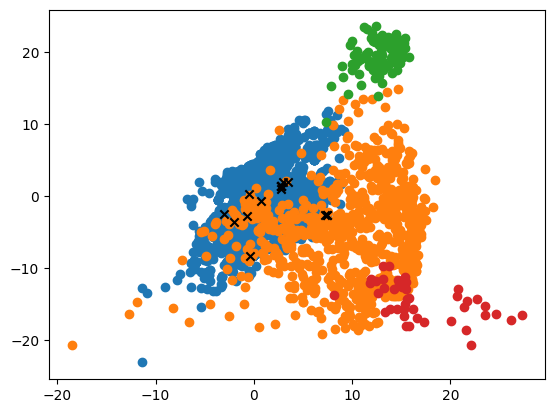

In [33]:
for label in unique_labels:
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1], label=label)
for label in overlap_points:
    # Select overlapping points for the current group
    overlapping_points = X_pca[overlap_points[label]]

    # Plot overlapping points with a different marker and/or color
    plt.scatter(overlapping_points[:, 0], overlapping_points[:, 1], marker='x', color='black', label=f'Overlap {label}')


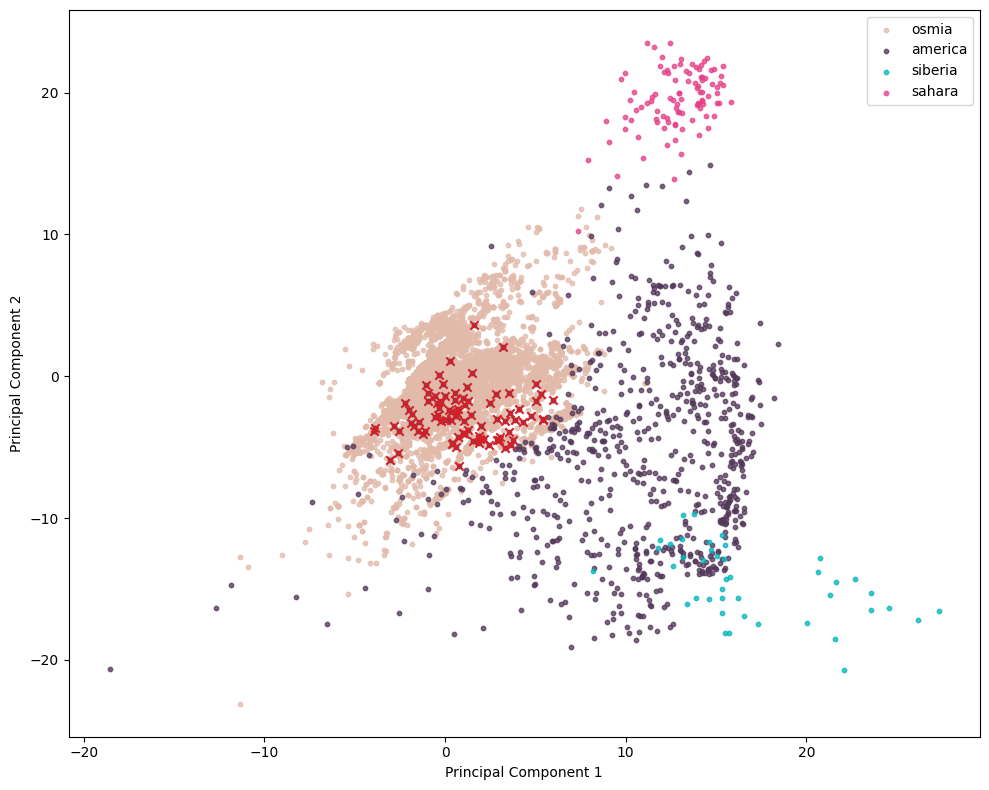

In [42]:
# Calculate centroids
centroid_osmia = np.mean(X_pca[y == 'osmia'], axis=0)

# Define a range for overlap, using standard deviation as an example
std_dev_osmia = np.std(np.sqrt(np.sum((X_pca[y == 'osmia'] - centroid_osmia)**2, axis=1)))

# Find overlapping points in 'America'
overlap_indices = []
for i, point in enumerate(X_pca[y == 'america']):
    distance = np.sqrt(np.sum((point - centroid_osmia)**2))
    if distance < std_dev_osmia*4:
        overlap_indices.append(i)

overlapping_points = X_pca[y == 'america'][overlap_indices]
plt.figure(figsize=(10, 8))
# Plot all PCA points
for i, label in enumerate(unique_labels):
    subset = combined[combined['group'] == label]  
    plt.scatter(subset['PC1'], subset['PC2'], c=colors[i], label=label, s=10, marker= 'o', alpha=0.76)
# plt.scatter(X_pca[y == 'osmia', 0], X_pca[y == 'osmia', 1], label='osmia', color='green')
# plt.scatter(X_pca[y == 'america', 0], X_pca[y == 'america', 1], label='America', color='blue')

# Highlight overlapping points
plt.scatter(overlapping_points[:, 0], overlapping_points[:, 1], c='#D31F26', marker='x')

# Labeling the plot
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.title('PCA of the Dataset with Overlapping Points Highlighted')
plt.legend()

plt.tight_layout()
plt.savefig('figures/pca2.png')


In [ ]:
test_points = america_points.iloc[overlap_indices]
test_points.to_csv('test_points.csv', index=False)

In [ ]:
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.580


In [57]:
america_points = X_pca[y == 'america']
osmia_points = X_pca[y == 'osmia']

threshold_distance = 1
close_points_indices = []

for i, america_point in enumerate(america_points):
    for osmia_point in osmia_points:
        distance = np.linalg.norm(america_point - osmia_point)
        if distance <= threshold_distance:
            close_points_indices.append(i)
            break  

close_america_points = america_points[close_points_indices]

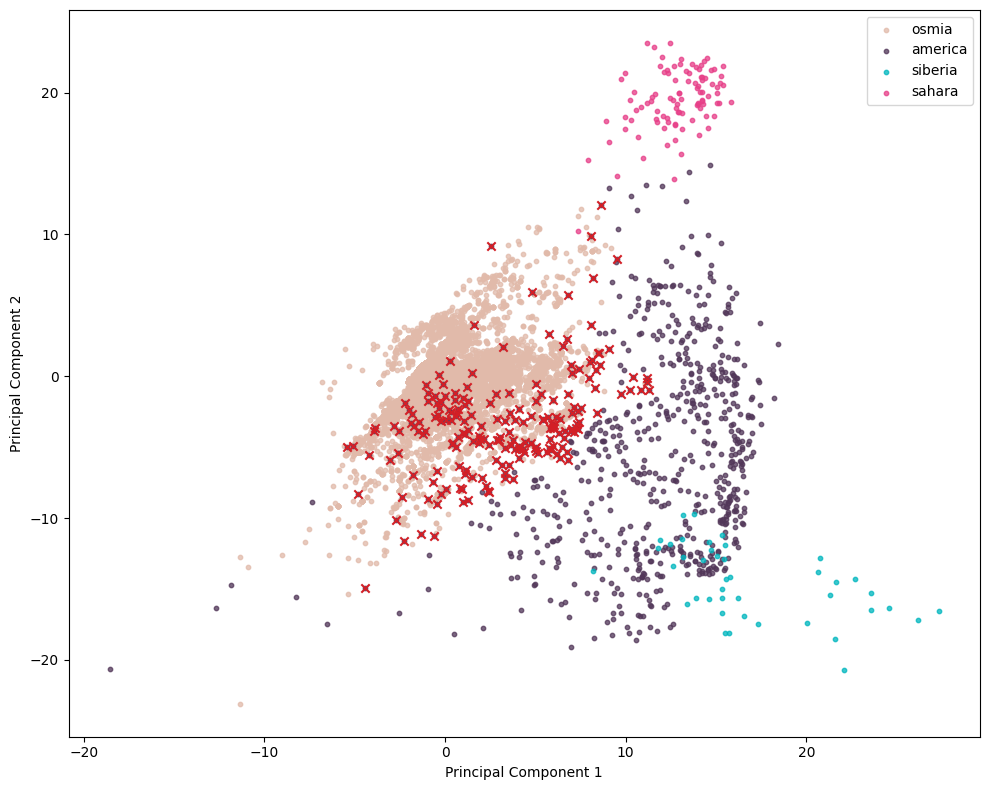

In [58]:
plt.figure(figsize=(10, 8))
# Plot all PCA points
for i, label in enumerate(unique_labels):
    subset = combined[combined['group'] == label]  
    plt.scatter(subset['PC1'], subset['PC2'], c=colors[i], label=label, s=10, marker= 'o', alpha=0.76)
# plt.scatter(X_pca[y == 'osmia', 0], X_pca[y == 'osmia', 1], label='osmia', color='green')
# plt.scatter(X_pca[y == 'america', 0], X_pca[y == 'america', 1], label='America', color='blue')

# Highlight overlapping points
plt.scatter(close_america_points[:, 0], close_america_points[:, 1], c='#D31F26', marker='x')

# Labeling the plot
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.title('PCA of the Dataset with Overlapping Points Highlighted')
plt.legend()

plt.tight_layout()
plt.savefig('figures/pca_new.png')

In [52]:
test_points = america_points.iloc[close_points_indices]
test_points.to_csv('test_points_new.csv', index=False)

# TSNE

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)

tsne_results = tsne.fit_transform(combined_scaled)
df_tsne = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])

In [ ]:
combined = combined.join(df_tsne[['TSNE1', 'TSNE2']])
combined

,bio_13,bio_11,bio_9,bio_3,elev,bio_5,bio_6,bio_17,bio_10,bio_2,...,bio_19,bio_7,bio_14,bio_18,ndvi,group,PC1,PC2,TSNE1,TSNE2
0,82.0,1.10,2.116667,29.925650,199,24.6,-2.3,125.0,18.533333,8.050000,...,132.0,26.900000,36.0,230.0,0.157664,osmia,3.526956,-0.501324,61.555397,-10.829092
1,82.0,1.10,2.116667,29.925650,199,24.6,-2.3,125.0,18.533333,8.050000,...,132.0,26.900000,36.0,230.0,0.157664,osmia,3.526956,-0.501324,61.555397,-10.829092
2,81.0,1.40,2.483333,30.308643,117,24.9,-2.1,120.0,18.816666,8.183333,...,125.0,27.000000,35.0,227.0,0.151344,osmia,3.742669,-0.013362,64.030426,-10.081723
3,81.0,1.40,2.483333,30.308643,117,24.9,-2.1,120.0,18.816666,8.183333,...,125.0,27.000000,35.0,227.0,0.151344,osmia,3.742669,-0.013362,64.030350,-10.081804
4,81.0,1.40,2.483333,30.308643,117,24.9,-2.1,120.0,18.816666,8.183333,...,125.0,27.000000,35.0,227.0,0.151344,osmia,3.742669,-0.013362,64.030350,-10.081804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33810,7.0,12.85,34.833332,37.915604,157,43.7,4.6,2.0,34.833332,14.825001,...,13.0,39.100002,0.0,2.0,0.075699,sahara,14.029757,19.202249,56.609142,43.875843
33811,13.0,10.00,25.516666,43.637386,588,33.3,3.7,0.0,25.516666,12.916666,...,33.0,29.599998,0.0,0.0,0.083983,sahara,10.939763,15.362520,56.010078,41.265690
33812,34.0,13.45,26.633333,45.172203,94,34.1,7.0,1.0,27.033333,12.241667,...,86.0,27.099998,0.0,7.0,0.072469,sahara,9.095258,16.538285,56.072018,41.097919
33813,10.0,12.70,26.050000,46.698112,129,32.8,6.3,0.0,26.050000,12.375000,...,25.0,26.500000,0.0,0.0,0.084076,sahara,9.954092,17.438537,56.145363,41.212421


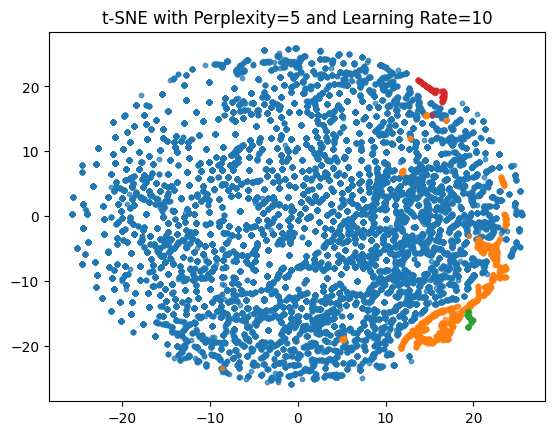

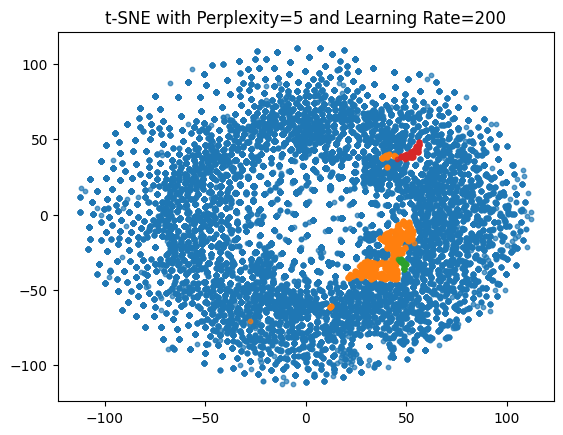

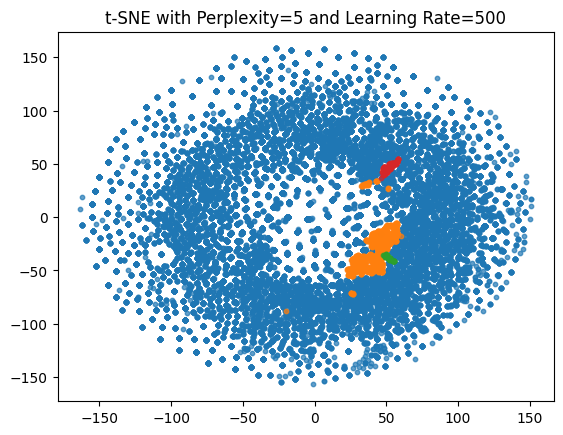

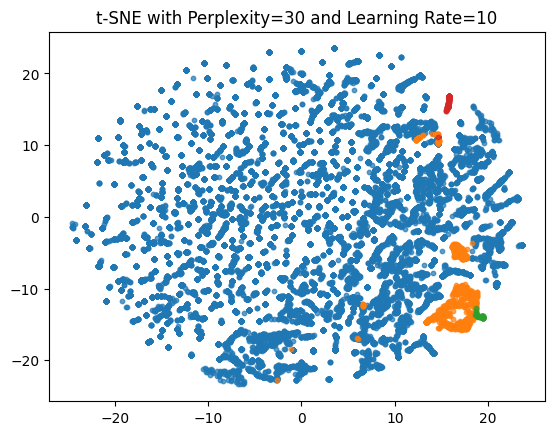

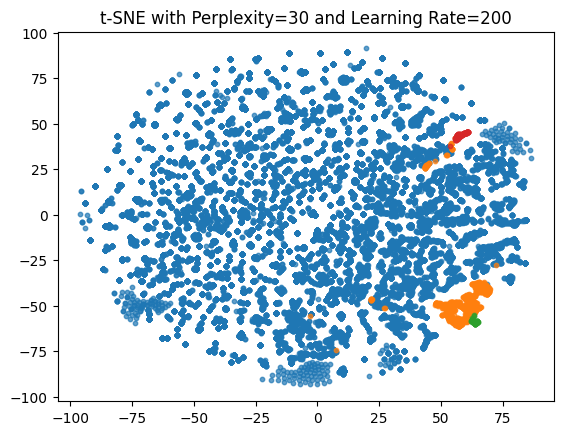

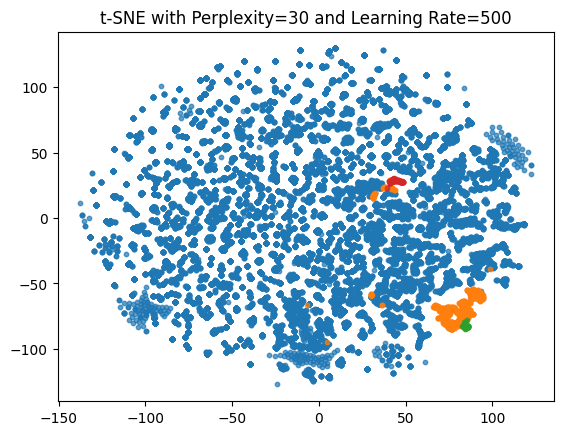

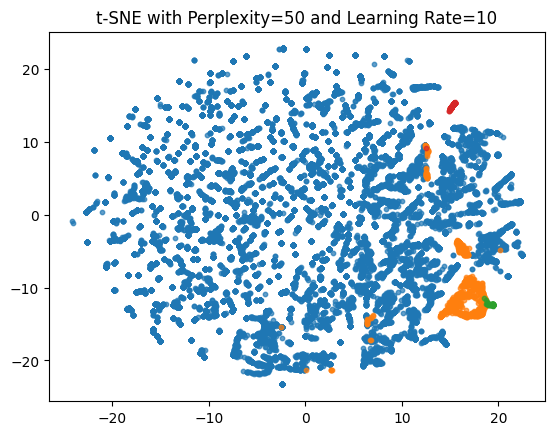

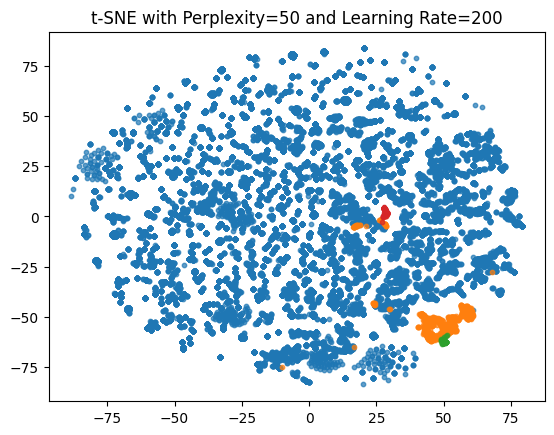

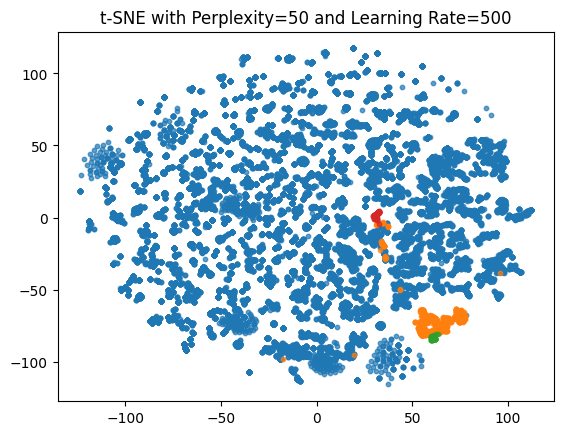

In [ ]:
for perplexity in [5, 30, 50]:
    for learning_rate in [10, 200, 500]:
        tsne = TSNE(n_components=2, perplexity=perplexity, learning_rate=learning_rate, random_state=42)
        tsne_results = tsne.fit_transform(combined_scaled)
        df_tsne = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
        combined['TSNE1'] = df_tsne['TSNE1']
        combined['TSNE2'] = df_tsne['TSNE2']

        for label in unique_labels:
            subset = combined[combined['group'] == label] 
            plt.scatter(subset['TSNE1'], subset['TSNE2'], label=label, s=10, marker= 'o', alpha=0.7)
        plt.title(f't-SNE with Perplexity={perplexity} and Learning Rate={learning_rate}')
        plt.show()

